### Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

#### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

<BarContainer object of 12 artists>

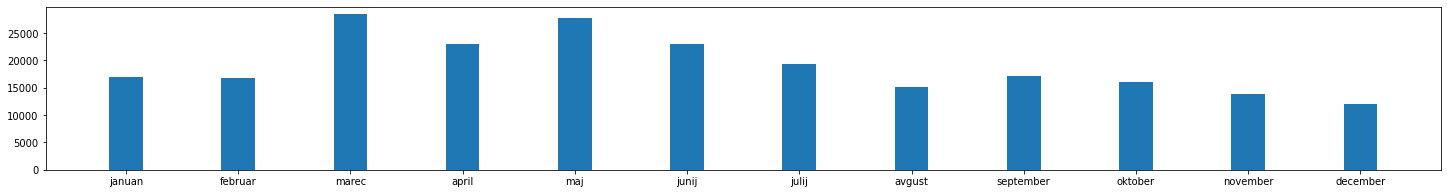

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import math


podatki = pd.read_csv("podatki.csv", delimiter=";", low_memory=False)


test = podatki["DATUM_PREGLEDA"].to_dict()

temp = {}

for k,v in test.items(): 
    s = v.split(".")[1]
    if s in temp.keys():
        temp[s] += 1
    else:
        temp[s] = 1
    

temp = dict(sorted(temp.items()))

mesci = ["januan","februar","marec","april","maj","junij","julij","avgust","september","oktober","november","december"]

plt.figure(figsize=(25, 3))
plt.bar(mesci, temp.values(), align='center', width=0.3)




Odgovor: **zapišite utemeljitev odgovora**

Problem je v tem, da so filmi tretirani samo glede njihove ocene, ne pa tudi število glasov. Zato pride do težave, ko so filmi z manj ocenami veliko boljše ocenjeni kot filmi z mnogo ocenami. Pomembno je razmerje med oceno in številom glasov. 
Rešitev bi bila ta, da ocene filmov zaokrožimo in nato filme z isto oceno razvrstimo še po številu ocen padajoče.

#### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import math

from datetime import datetime

def days_between(dR, dP):
    dR = datetime.strptime(dR, "%d.%m.%Y")
    dP = datetime.strptime(dP, "%d.%m.%Y")
    return ((dP - dR).days)


podatki = pd.read_csv("podatki.csv", delimiter=";", low_memory=False)


podatki[["DATUM_PRVE_REGISTRACIJE_SLO","DATUM_PREGLEDA","PREVOZENI_KILOMETRI"]]

array = {}
amd = 0

for ind in podatki.index:
    datum_reg = podatki['DATUM_PRVE_REGISTRACIJE_SLO'][ind]
    datum_preg = podatki['DATUM_PREGLEDA'][ind]
    kil = podatki['PREVOZENI_KILOMETRI'][ind]

    if math.isnan(kil) or kil > 1000000:
        continue

    if isinstance(datum_preg,str) and isinstance(datum_reg,str) :
        dnevi = days_between(datum_reg, datum_preg)
        if dnevi <= 0:
            continue
        else:
            temp = kil / dnevi

        array[ind] = temp

my_keys = sorted(array, key=array.get, reverse=True)[:5]
#print(my_keys)
for i in my_keys:
    print(podatki.loc[[i]][["ZNAMKA", 'DATUM_PRVE_REGISTRACIJE_SLO', 'DATUM_PREGLEDA', 'PREVOZENI_KILOMETRI']], array[i])




       ZNAMKA DATUM_PRVE_REGISTRACIJE_SLO DATUM_PREGLEDA  PREVOZENI_KILOMETRI
148334   SEAT                  29.08.2020     26.08.2021             212577.0 587.2292817679559
       ZNAMKA DATUM_PRVE_REGISTRACIJE_SLO DATUM_PREGLEDA  PREVOZENI_KILOMETRI
147143   FIAT                  13.11.2020     15.11.2021             152255.0 414.86376021798367
       ZNAMKA DATUM_PRVE_REGISTRACIJE_SLO DATUM_PREGLEDA  PREVOZENI_KILOMETRI
33763  TOYOTA                   1.04.2019     29.03.2021             201574.0 276.8873626373626
               ZNAMKA DATUM_PRVE_REGISTRACIJE_SLO DATUM_PREGLEDA  \
211186  MERCEDES BENZ                   5.10.2010     30.09.2021   

        PREVOZENI_KILOMETRI  
211186             992611.0   247.34886618489907
      ZNAMKA DATUM_PRVE_REGISTRACIJE_SLO DATUM_PREGLEDA  PREVOZENI_KILOMETRI
20673    BMW                   1.03.2018      5.03.2021             265555.0 241.41363636363636


Odgovor: **zapišite utemeljitev odgovora**

#### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

In [ ]:
import matplotlib.pyplot as plt 
from csv import DictReader
import math

readerR = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))

dictRating = {}

for row in readerR:
    if row["movieId"] in dictRating.keys():
            dictRating[row["movieId"]][0] += float(row["rating"])
            dictRating[row["movieId"]][1] += 1
    else:
        dictRating[row["movieId"]] = [float(row["rating"]),1]

maxCount = max(dictRating.items(), key=lambda item: item[1][1])[1][1]

ratingArray = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
divider = (maxCount+1)/10
for key, value in dictRating.items():
        temp = math.floor(value[1]/divider)
        ratingArray[temp][0] += value[0]
        ratingArray[temp][1] += value[1]

c = [0]
for i in range(1,10):
        c.append((int(i*divider)))

newArray = [el[0]/el[1] for el in ratingArray]


plt.plot(c, newArray)
plt.show()


Odgovor: **zapišite utemeljitev odgovora**

Kot je razvidno iz grafa je povprečna ocena filma višja bolj kot je film popularen. To je smiselno, saj boljši filmi bodo dobili več ocen kot slabši.

#### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

In [ ]:
from csv import DictReader



readerM = DictReader(open('podatki/ml-latest-small/movies.csv', 'rt', encoding='utf-8'))
readerR = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))

rowsM = []
for row in readerM:
        rowsM.append(row)

movieD = {}

for r in rowsM:
    movieD[r["movieId"]] = [r["title"],[]] #prva je ocena, druga je timestamp

rowsR = []
for row in readerR:
    rowsR.append(row)


for r in rowsR:
    movieD[r["movieId"]][1].append((r["rating"],r["timestamp"]))

for key, value in movieD.items():
    value[1].sort(key=lambda x: x[1])

lastMovies = 100

def movieGraph (id):
    t = movieD[id][1] #1, 2571

    avgRatingArr = []
    timestampArr = []
    for i in range(lastMovies,len(t)):
        tempSum = 0.0
        for a in t[i-lastMovies:i]:
            tempSum += float(a[0])
        avg = tempSum/lastMovies
        avgRatingArr.append(avg)
        timestampArr.append(t[i][1])

    plt.plot(timestampArr, avgRatingArr)
    plt.show()

print("Toy Story (1995)")
movieGraph('1')
print("Die hard (1988)")
movieGraph('1036')



Odgovor: **zapišite utemeljitev odgovora**

V vsaki točki grafa prikazujeta povprečno oceno prejšnjih 100 ocen. Iz tega je razvidno, da so se povprečne ocene filmo spreminjale. Npr. Toy Story (1995) je začel popularen nato je nekoliko zanihal in proti koncu postane spet bolj popularen.

#### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

In [ ]:
from csv import DictReader



readerC = DictReader(open('podatki/ml-latest-small/cast.csv', 'rt', encoding='utf-8'))
readerR = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))

rowsC = []
for row in readerC:
        rowsC.append(row)


rowsR = []
for row in readerR:
        rowsR.append(row)

ratingDict = {}

for r in rowsR:
    if r["movieId"] in ratingDict.keys():
        ratingDict[r["movieId"]] += 1
    else:
        ratingDict[r["movieId"]] = 1


castDict = {}
castRatingDict = {}

for r in rowsC:
    for a in filter(None,r["cast"].split("|")):
        castRatingDict[a] = 0
        if a in castDict.keys():
            castDict[a].append(r["movieId"])
        else:
            castDict[a] = [r["movieId"]]

for key, value in castDict.items():
    temp = 0
    for movie in value:
        if movie in ratingDict.keys():
            temp += int(ratingDict[movie])
    castRatingDict[key] = temp

a = {k: v for k, v in sorted(castRatingDict.items(), key=lambda item: item[1], reverse=True)}

print(list(a.items())[:10])

Odgovor: **zapišite utemeljitev odgovora**

Popularnost igralcev sem ocenil po številu ocen, ki so jih prejeli filmi v katerih so igrali. To se mi je zdelo smiselno, saj za popularnost je pomembno število ocen filma in ne pa povprečna ocena. Npr. igralec ki igra v enem filmu z oceno 5 bo imel povprpečno oceno 5 in je mnogo manj popularen kot nekdo, ki ima povprečno oceno 4.99 in igra v 1000 filmih.

#### Bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **zapišite utemeljitev odgovora**

China salesman (2017), ker igrata Mike Tyson in Steven Seagal.

### Zapiski
Za nalaganje podatkov lahko uporabite modul `csv`.

In [2]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [ ]:
user, movie, rating, timestamp

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [ ]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts